In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

/Users/ozguru/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv(filepath_or_buffer="../assets/admissions.csv")

In [7]:
df.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')

In [8]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [9]:
df.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

In [10]:
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])


prestige  1.0  2.0  3.0  4.0
admit                       
0          28   97   93   55
1          33   53   28   12


In [11]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c0a835610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c12d7ac90>]], dtype=object)

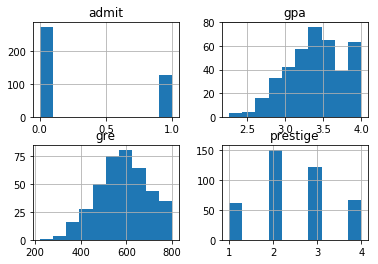

In [12]:
pl.show()

In [15]:
dummies = pd.get_dummies(df['prestige'], prefix="Prestige")

In [26]:
cols_to_keep = ['admit', 'gre', 'gpa']

In [31]:
print dummies.loc[:, "Prestige_2.0":]

     Prestige_2.0  Prestige_3.0  Prestige_4.0
0               0             1             0
1               0             1             0
2               0             0             0
3               0             0             1
4               0             0             1
5               1             0             0
6               0             0             0
7               1             0             0
8               0             1             0
9               1             0             0
10              0             0             1
11              0             0             0
12              0             0             0
13              1             0             0
14              0             0             0
15              0             1             0
16              0             0             1
17              0             1             0
18              1             0             0
19              0             0             0
20              0             1   

In [32]:
data = df[cols_to_keep].join(dummies.loc[:, "Prestige_2.0":])

In [33]:
print data

     admit    gre   gpa  Prestige_2.0  Prestige_3.0  Prestige_4.0
0        0  380.0  3.61             0             1             0
1        1  660.0  3.67             0             1             0
2        1  800.0  4.00             0             0             0
3        1  640.0  3.19             0             0             1
4        0  520.0  2.93             0             0             1
5        1  760.0  3.00             1             0             0
6        1  560.0  2.98             0             0             0
7        0  400.0  3.08             1             0             0
8        1  540.0  3.39             0             1             0
9        0  700.0  3.92             1             0             0
10       0  800.0  4.00             0             0             1
11       0  440.0  3.22             0             0             0
12       1  760.0  4.00             0             0             0
13       0  700.0  3.08             1             0             0
14       1

In [34]:
data['intercept'] = 1.0

In [35]:
train_cols = data.columns[1:]

In [41]:
logit = sm.Logit(data['admit'], data[train_cols])

ValueError: On entry to DLASCL parameter number 5 had an illegal value